In [1]:
# Calculate bioprinted cell viability

In [2]:
import matplotlib.pyplot as plt; 
import numpy as np; 
import csv;
import os;

In [3]:
# List csv file names 

csv_countess_filenames = ["0_0", "P0_0", "P1.5_0", "P3.0_0", "P5.5_0", "P10.0_0"];
sample_names = ["Unprinted", "0 psi", "1.5 psi", "3.0 psi", "5.5 psi", "10.0 psi"];


In [4]:
def find_percentage_each_cell_size(size, viable, dead, total):
    
    total_viable = sum(viable)
    total_dead = sum(dead)
    total_total = sum(total)
    
    for i in range(len(viable)):
        viable[i] = viable[i]/total_viable
        dead[i] = dead[i]/total_dead
        total[i] = total[i]/total_viable
    
    return(viable, dead, total)
    

In [5]:
# Calculate the CFD from PDF 
def calculate_cdf_from_pdf(viable, dead, total):
    
    cfd_viable = []; cfd_dead = []; cfd_total = []; 
    for i in range(len(viable)):
        cfd_viable.append(0);
        cfd_dead.append(0);
        cfd_total.append(0);
        
    for i in range(len(viable)):
        cfd_viable[i] = sum(viable[0:i])
        cfd_dead[i] = sum(viable[0:i])
        cfd_total[i] = sum(viable[0:i])
        
    return(cfd_viable, cfd_dead, cfd_total)
       

In [6]:
# Make tables of CDC data for each cancer type, for each data type
def parse_csv_countess(filename, analysis_type):
    replicate_suffix_list = ["_A", "_B"];
    
    for suffix in range(len(replicate_suffix_list)):
        
        # Build filename to look in the Data archive
        file = os.path.join("Data saved to csv", filename + replicate_suffix_list[suffix] + ".csv")
        
        # Open CDC files and read in all lines
        data = [];
        f = open(file,'r')
        for line in f: data.append(line)
        f.close() 
        
        # Build the list
        if suffix == 0:
            size = []; viable = []; dead = []; total = [];
            for data_row in range(len(data)):
                size.append(0); viable.append(0); dead.append(0); total.append(0);
        
        x = [0, 0, 0, 0]; 
        for i in range(len(data)):
            x = data[i].split(",")
            if i > 0: 
                size[i] = size[i]+int(x[0]);
                viable[i] = viable[i]+int(x[1]);
                dead[i] = dead[i] +int(x[2]);
                total[i] = total[i]+int(x[3]);
                
    if analysis_type == "percentage": 
        viable, dead, total = find_percentage_each_cell_size(size, viable, dead, total)
            
    if analysis_type == "cfd":
        viable, dead, total = find_percentage_each_cell_size(size, viable, dead, total)
        viable, dead, total = calculate_cdf_from_pdf(viable, dead, total)
                
    return(size, viable, dead, total)


In [7]:
def pdf_cell_size(csv_countess_filenames, sample_names, title, data_type, analysis_type):

    for i in range(len(csv_countess_filenames)):
        size, viable, dead, total = parse_csv_countess(csv_countess_filenames[i], analysis_type)
        
        if data_type == "Viable": 
            plt.scatter(size,viable)
            plt.plot(size, viable)
            
        if data_type == "Dead": 
            plt.scatter(size,dead)
            plt.plot(size, dead)
    
    plt.title(title)
    plt.xlabel(data_type + ' Cell Diameter (um)'); plt.xlim((5,35))
        
    if analysis_type == "percentage":
        plt.ylabel('Cell / Cell Count'); 
        
    elif data_type == "cdf":
        plt.ylabel('Cell / Cell Count'); 
        
    else: 
        plt.ylabel('Cell Count');

    
    if analysis_type == "cdf":
        plt.legend(sample_names,loc='upper left')


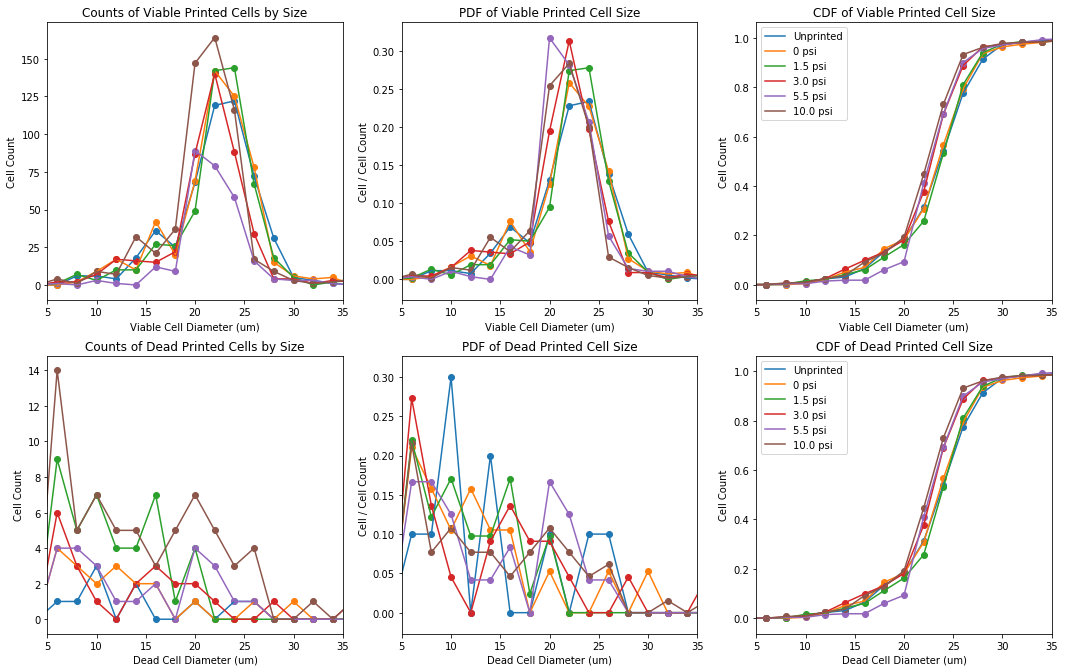

In [8]:
# Make the figure of pdf of the viable cell diameter



box_size = 4.5; fig = plt.figure(1, figsize=(4*box_size, 2.5*box_size)); plot_number = 230;

data_type = "Viable"
plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
pdf_cell_size(csv_countess_filenames, sample_names, "Counts of "+ data_type +" Printed Cells by Size", data_type, "total counts")

plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
pdf_cell_size(csv_countess_filenames, sample_names, "PDF of "+ data_type +" Printed Cell Size", data_type, "percentage")

plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
pdf_cell_size(csv_countess_filenames, sample_names, "CDF of "+ data_type +" Printed Cell Size", data_type, "cdf")

data_type = "Dead"
plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
pdf_cell_size(csv_countess_filenames, sample_names, "Counts of "+ data_type +" Printed Cells by Size", data_type, "total counts")

plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
pdf_cell_size(csv_countess_filenames, sample_names, "PDF of "+ data_type +" Printed Cell Size", data_type, "percentage")

plot_number = plot_number+1;  
ax = fig.add_subplot(plot_number);
pdf_cell_size(csv_countess_filenames, sample_names, "CDF of "+ data_type +" Printed Cell Size", data_type, "cdf")


filename = os.path.join("Figures" , "PDF and CDF of Cell Diameter" + '.jpg')
plt.savefig(filename, bbox_inches='tight') 
plt.show()